### 7-3．딥러닝을 위한 데이터의 준비
#### 모든 기사의 띄어쓰기

In [1]:
# konlpy의 인스톨
!pip install konlpy

  Using cached konlpy-0.5.2-py2.py3-none-any.whl (19.4 MB)
  Using cached JPype1-0.7.2-cp37-cp37m-win_amd64.whl (1.3 MB)
  Using cached beautifulsoup4-4.6.0-py3-none-any.whl (86 kB)
  Using cached tweepy-3.8.0-py2.py3-none-any.whl (28 kB)
  Using cached lxml-4.5.0-cp37-cp37m-win_amd64.whl (3.7 MB)


In [2]:
# nltk의 인스톨
!pip install nltk

Processing c:\users\fshare\appdata\local\pip\cache\wheels\45\6c\46\a1865e7ba706b3817f5d1b2ff7ce8996aabdd0d03d47ba0266\nltk-3.5-py3-none-any.whl
  Using cached tqdm-4.45.0-py2.py3-none-any.whl (60 kB)
  Using cached regex-2020.4.4-cp37-cp37m-win_amd64.whl (271 kB)


In [3]:
import os
import re
from konlpy.tag import Okt
okt = Okt()

# 기사 폴더를 지정
dirs = ['it-life-hack', 'movie-enter']

# 단어와 레이블을 보존하는 리스트를 생성
wakati = []     # 설명변수
label = []       # 목적변수

# 띄어쓰기용 함수를 생성
def spacing_okt(sentence):
    tagged = okt.pos(sentence)
    corrected = ""
    for token in tagged:
        if token[1] in ('Josa', 'PreEomi', 'Eomi', 'Suffix', 'Punctuation'):
            corrected += " " + "'" + token[0] + "'" + ","
        else:
            corrected += " " + "'" + token[0] + "'" + ","
    if corrected[0] == " ":
        corrected = corrected[1:]
    return corrected

# 각 폴더의 파일을 하나씩 읽어와서 표시
for i, d in enumerate(dirs):
    # 파일명을 취득
    files = os.listdir('./data/' + d)

    # 파일을 오픈해서 내용을 취득
    for file in files:
        f = open('./data/' + d + '/' + file, 'r', encoding='utf-8')
        text = f.read()

        # 정규표현에서 불필요한 문자열을 제거해서 표시
        reg_text = re.sub(r'[0-9a-zA-Z]+', '', text)
        reg_text = re.sub(r'[:;/+\.-]', '', reg_text)
        reg_text = re.sub(r'[\s\n]', '', reg_text)

        # 띄어쓰기를 하고 단어를 리스트에 보존
        wakati.append(spacing_okt(reg_text))

        # 기사별로 레이블을 붙여서 보존
        label.append(i)
        # 파일을 클로즈
        f.close()

In [4]:
# 리스트의 사이즈 확인
print(len(wakati))
# 첫번째 기사의 단어를 확인
print(wakati[0])
# 첫번째 기사의 레이블을 확인
print(label[0])

400
'구형', '에서', '금단', '의', '파워', '업', '!', '최신', '나', '소프트웨어', '를', '한꺼', '번', '에', '체크', '[', '플래시백', ']', '텔레비전', '이나', '와', '연', '계', '할수있는나', '프로세서', ',', '전환', '등', '재미있는가', '속속', '등장', '했다', '구형', '의', '금단', '이라고도', '할수있는', '파워', '업', '방법', '에서의', '최신', ',', '화제', '의', ',', '새로운', '보안', '소프트웨어', '까지', '한꺼', '번', '에', '소개', '합니다', '■', '인텔', '을', '에', '장착', '!', '구형', '은', '얼마나', '빨라질', '것', '인가', '?(', '위', ')', '인텔', '이', '최신', ''', '시리즈', ''', '를', '출시', '했다', '현재', '중', '에서도', '최고', '의', '성능', '을', '자랑', '하', '는', '이', '제품', '을', '구형', '의', '고속', '화', '를', '도모', '한다는', '점', '에서', '리뷰', '해보았다', '조금', '색다른', '리뷰', '가', '되지만', ',', '어느', '정도', '의', '효과', '가', '있는지', ',', '기', '대가', '크다', '■', '는사', '용하는가', '(', '인텔', '등', ')', '에서', '으로', '전환', '가능한', '하이브리드', ',', '하지', '만이', '와', '동시', '에도', '바뀐다', '■', '초기', '비용', ',', '업데이트', '비용', '모두', '무료', '!', '저스트', '시스템', ',', '도마뱀', '로그', '가', '인상', '적', '인', '보안', '소프트웨어', '현재', '는', '많은', '사용자', '들이에', '보안', '프로그램', '을', '도입', '하고',

#### 단어의 수치화

In [5]:
import itertools
from collections import Counter
import pandas as pd

# 단어의 출현회수를 카운트
word_freq = Counter(itertools.chain(* wakati))

# 단어를 출현회수 내림차순으로 소트
dic = []
for word_uniq in word_freq.most_common():
    dic.append(word_uniq[0])

# 단어수를 확인
print(len(dic))
print(pd.DataFrame(dic).head())

1481
   0
0  '
1  ,
2   
3  이
4  다


In [6]:
# 단어에 ID를 부여하고 사전을 작성
dic_inv = {}
for i, word_uniq in enumerate(dic, start=1):
    dic_inv.update({word_uniq: i})
    
# 사전의 길이를 확인
print(len(dic_inv))

1481


In [7]:
# 연습문제 4
# 단어를 ID로 변환
wakati_id = [ [ dic_inv[word] for word in waka ] for waka in wakati ]

# 리스트의 사이즈 확인
print(len(wakati_id))
# 첫번째 기사의 단어 ID를 확인
print(wakati_id[0])

400
[1, 93, 242, 1, 2, 3, 1, 7, 20, 1, 2, 3, 1, 157, 162, 1, 2, 3, 1, 8, 1, 2, 3, 1, 132, 262, 1, 2, 3, 1, 200, 1, 2, 3, 1, 65, 1, 2, 3, 1, 133, 73, 1, 2, 3, 1, 41, 1, 2, 3, 1, 70, 88, 39, 421, 26, 1, 2, 3, 1, 25, 1, 2, 3, 1, 19, 750, 1, 2, 3, 1, 176, 1, 2, 3, 1, 7, 1, 2, 3, 1, 182, 96, 1, 2, 3, 1, 173, 1, 2, 3, 1, 226, 156, 27, 338, 1, 2, 3, 1, 186, 1, 2, 3, 1, 406, 120, 80, 47, 1, 2, 3, 1, 4, 41, 1, 2, 3, 1, 66, 1, 2, 3, 1, 76, 1, 2, 3, 1, 97, 1, 2, 3, 1, 77, 36, 18, 6, 41, 1, 2, 3, 1, 88, 15, 79, 20, 1, 2, 3, 1, 2, 1, 2, 3, 1, 47, 292, 1, 2, 3, 1, 92, 1, 2, 3, 1, 118, 61, 18, 6, 14, 1, 2, 3, 1, 179, 179, 1, 2, 3, 1, 92, 52, 1, 2, 3, 1, 108, 5, 1, 2, 3, 1, 93, 242, 1, 2, 3, 1, 8, 1, 2, 3, 1, 157, 162, 1, 2, 3, 1, 4, 28, 11, 22, 1, 2, 3, 1, 77, 36, 18, 6, 1, 2, 3, 1, 132, 262, 1, 2, 3, 1, 200, 1, 2, 3, 1, 181, 244, 1, 2, 3, 1, 7, 20, 8, 1, 2, 3, 1, 133, 73, 1, 2, 3, 1, 2, 1, 2, 3, 1, 38, 44, 1, 2, 3, 1, 8, 1, 2, 3, 1, 2, 1, 2, 3, 1, 224, 15, 109, 1, 2, 3, 1, 50, 165, 1, 2, 3, 1, 70, 8

In [8]:
# Keras를 인스톨
!pip install keras

In [9]:
from keras.preprocessing import sequence
import numpy as np

# 가변사이즈를 고정사이즈로 변환
wakati_id = sequence.pad_sequences(np.array(wakati_id), maxlen=399, padding="post", truncating="post")

# label을Numpy배열로 변환
label = np.array(label)

# 첫번째 기사의 단어 ID를 확인
print(wakati_id[0])

Using TensorFlow backend.


[  1  93 242 ...   0   0   0]


##### === 모델의 작성은 여기서부터 ======================

In [10]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

model = Sequential()
# 
model.add(Embedding(11540, 512, input_length=399))
# 
model.add(LSTM(128, dropout=0.5))
# 
model.add(Dense(1, activation='sigmoid'))

# 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 399, 512)          5908480   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               328192    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 6,236,801
Trainable params: 6,236,801
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 학습조건의 설정　오차함수 = 2값의 교차 엔트로피, 최적화 방법 = Adam법, 측정방법 = 모델의 정밀도
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습의 실행
hist = model.fit(wakati_id, label, batch_size=32, verbose=1, 
                 epochs=30, validation_split=0.2)

Train on 320 samples, validate on 80 samples
Epoch 1/30
320/320 [==============================] - 15s 47ms/step - loss: 0.6753 - acc: 0.6219 - val_loss: 1.0010 - val_acc: 0.0250
Epoch 2/30
320/320 [==============================] - 11s 35ms/step - loss: 0.6490 - acc: 0.6937 - val_loss: 0.8826 - val_acc: 0.1125
Epoch 3/30
320/320 [==============================] - 11s 35ms/step - loss: 0.6452 - acc: 0.7031 - val_loss: 1.0383 - val_acc: 0.1250
Epoch 4/30
320/320 [==============================] - 11s 35ms/step - loss: 0.6364 - acc: 0.7031 - val_loss: 1.0383 - val_acc: 0.1750
Epoch 5/30
320/320 [==============================] - 11s 35ms/step - loss: 0.6266 - acc: 0.7031 - val_loss: 1.0311 - val_acc: 0.1750
Epoch 6/30
320/320 [==============================] - 12s 39ms/step - loss: 0.6143 - acc: 0.7031 - val_loss: 1.0000 - val_acc: 0.2000
Epoch 7/30
320/320 [==============================] - 15s 48ms/step - loss: 0.5996 - acc: 0.7000 - val_loss: 0.8992 - val_acc: 0.2250
Epoch 8/30
320/32

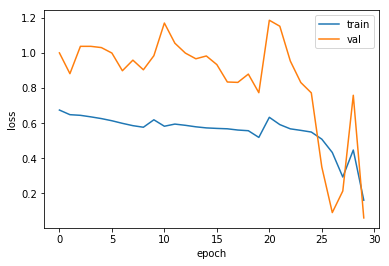

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

# 훈련데이터와 테스트 데이터의 오차의 이력을 플로트
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

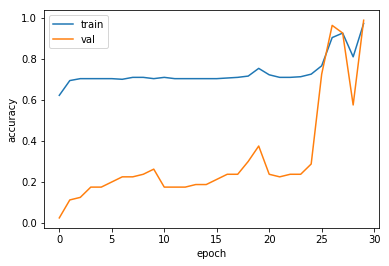

In [13]:
# 훈련데이터와 테스트 데이터의 정밀도의 이력을 플로트
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

##### === 모델의 작성은 여기까지 ======================